# Customer Segmentation Analysis

### Objective:

    The objective of this data analytics project is to conduct customer segmentation analysis for an e-commerce company. Through the examination of customer behavior and purchase patterns, the aim is to categorize customers into distinct segments. This segmentation will serve to guide targeted marketing strategies, enhance customer satisfaction, and optimize overall business strategies

### Problem Statement:

    This data analytics project aims to segment customers for an e-commerce company by analyzing their behavior and purchase patterns. The objective is to group customers into distinct segments to inform targeted marketing strategies, improve customer satisfaction, and enhance overall business strategies.
    
    In this project, the primary objective is to conduct customer segmentation analysis for an e-commerce company. To achieve this, we will start by obtaining a dataset containing customer information, purchase history, and other relevant data. Upon acquiring the dataset, we will embark on a journey of data exploration and cleaning, aiming to understand its structure and address any missing or inconsistent data points.

    Following data preparation, we will delve into calculating descriptive statistics, such as average purchase value and frequency of purchases, to gain a deeper understanding of the dataset's characteristics. Once we have a comprehensive grasp of the data, we will employ clustering algorithms, such as K-means, to segment customers based on their behavior and purchase patterns.

    Visualization will play a crucial role in this process as we create various visual representations, including scatter plots and bar charts, to illustrate the identified customer segments effectively. Finally, we will analyze the characteristics of each segment and draw actionable insights to inform targeted marketing strategies, enhance customer satisfaction, and optimize overall business strategies

In [52]:
# Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
#Load the dataset
df = pd.read_csv('ifood_df.csv')

In [24]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


### DataFrame Overview

    Here, we're displaying the first few rows of the DataFrame using df.head() and providing a concise summary of its structure and data types with df.info().

In [25]:
# Print the first few rows of the dataset
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Missing Values Summary

In [27]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [28]:
df.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [29]:
df.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

### Box Plot for Total Amount Spent
This plot showcases the distribution of customer spending, represented by the 'MntTotal' variable. The box indicates the interquartile range, with the median marked by the central line. Whiskers extend to 1.5 times the IQR, identifying outliers. It provides a quick overview of customer spending behavior

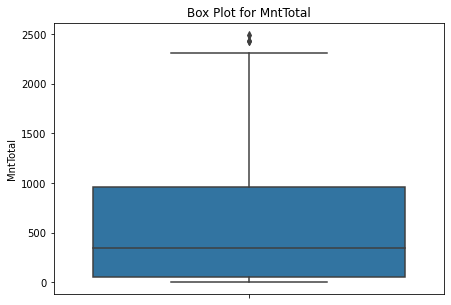

In [30]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

### Outlier Detection for Total Amount Spent

    In this section, we conduct outlier detection for the 'MntTotal' variable, which signifies the total amount spent by customers.

    Initially, we rename the DataFrame variable 'data' to 'df' to maintain clarity and consistency in our code.

    Next, we calculate the first quartile (Q1) and the third quartile (Q3) of the 'MntTotal' variable using the quantile() function. These quartiles are essential for computing the Interquartile Range (IQR).

    The IQR, calculated as the difference between Q3 and Q1, helps us determine the spread of the data.

    By multiplying the IQR by 1.5, we establish thresholds for identifying outliers: the lower bound (Q1 - 1.5 * IQR) and the upper bound (Q3 + 1.5 * IQR).

    Subsequently, we filter the DataFrame to isolate outliers, defined as data points falling below the lower bound or above the upper bound.

    This process enables us to pinpoint potential anomalies in customer spending behavior, aiding in further analysis or corrective actions.

In [32]:
# Rename the variable 'data' to 'df'
data=df

# Calculate the quantiles
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]

# Print the outliers
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [33]:
data = data[(data['MntTotal'] > lower_bound) & (data['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


### Income Distribution Box Plot

    This plot illustrates the distribution of customer income using a box plot visualization. The box represents the interquartile range (IQR), with the median income indicated by the central line. The whiskers extend to 1.5 times the IQR from the first and third quartiles, identifying potential outliers. The color palette 'viridis' enhances readability, allowing for quick insights into income distribution among customers.

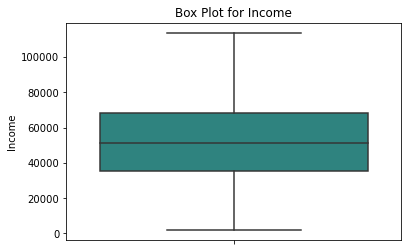

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

### Income Distribution Histogram

    This histogram showcases the distribution of customer income, providing insights into its frequency and variability. With 30 bins, it offers granularity in depicting income ranges, while the kernel density estimation (KDE) curve enhances the visualization of the probability density function. The plot allows for a quick understanding of income distribution patterns among customers, aiding in further analysis and decision-making

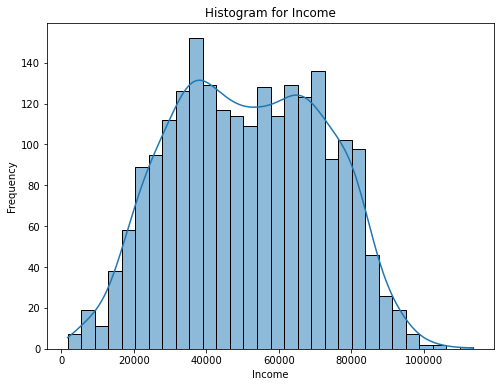

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

### Age Distribution Histogram

    This histogram displays the distribution of customer ages, providing insights into their frequency across different age groups. With 30 bins, the plot offers granularity in depicting age ranges, while the kernel density estimation (KDE) curve enhances the visualization of the probability density function. The plot facilitates a quick understanding of age distribution patterns among customers, enabling further analysis and decision-making.

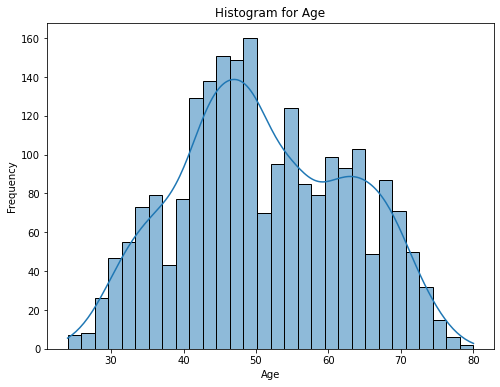

In [40]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Categorization of Data Columns

In [43]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
plt.show()

### Correlation Matrix Heatmap

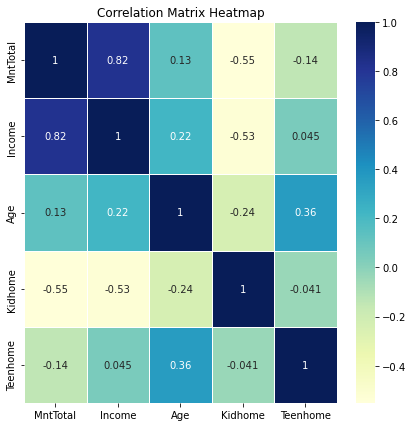

In [46]:
corr_matrix = data[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Point-Biserial Correlation Analysis for Marital Status

In [50]:
for col in cols_marital:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0053: Point-Biserial Correlation for marital_Divorced with p-value 0.8041
-0.0188: Point-Biserial Correlation for marital_Married with p-value 0.3767
0.0011: Point-Biserial Correlation for marital_Single with p-value 0.9571
0.0008: Point-Biserial Correlation for marital_Together with p-value 0.9708
0.0370: Point-Biserial Correlation for marital_Widow with p-value 0.0826


### Point-Biserial Correlation Analysis for Education Level

In [54]:
for col in cols_education:
    correlation, p_value = pointbiserialr(data[col], data['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

-0.0593: Point-Biserial Correlation for education_2n Cycle with p-value 0.0054
-0.1389: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0159: Point-Biserial Correlation for education_Graduation with p-value 0.4551
0.0004: Point-Biserial Correlation for education_Master with p-value 0.9842
0.0737: Point-Biserial Correlation for education_PhD with p-value 0.0005


### Marital Status Categorization Function

In [53]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

### Total Purchase Amount by Marital Status

Text(0, 0.5, 'MntTotal')

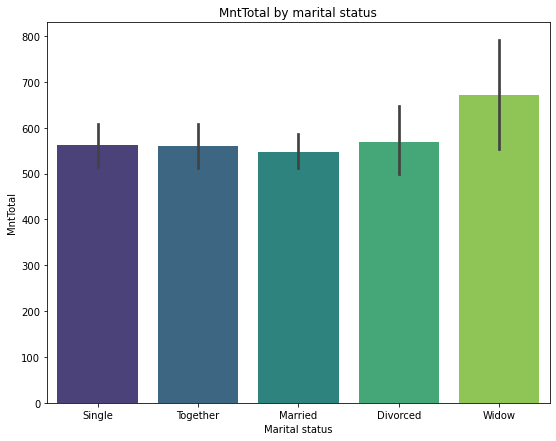

In [57]:
plt.figure(figsize=(9, 7))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

### Creating a Relationship Indicator Column

In [59]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,Single,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,Together,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,Married,1


### Scaling Features for Clustering with StandardScaler

    This Python code uses StandardScaler from sklearn to normalize selected columns ('Income', 'MntTotal', and 'In_relationship') in the data DataFrame. Normalization is done to ensure these features have a mean of zero and standard deviation of one, optimizing them for clustering algorithms. The scaled data is stored in data_scaled, and its statistical summary is displayed using .describe().

In [60]:
scaler = StandardScaler()
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
data_scaled = data.copy()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.202000e+03,2.202000e+03,2.202000e+03
mean,2.287125e-17,-9.246817e-17,-6.705707e-17
std,1.000227e+00,1.000227e+00,1.000227e+00
min,-2.410685e+00,-9.724232e-01,-1.348874e+00
25%,-7.926475e-01,-8.815089e-01,-1.348874e+00
50%,-1.508040e-02,-3.806058e-01,7.413589e-01
75%,8.017617e-01,7.024988e-01,7.413589e-01
max,3.006747e+00,3.048788e+00,7.413589e-01


In [61]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

### Resolving Namespace Conflict: 'KMeans'

In [62]:
# Check if there is a variable named 'KMeans'
if 'KMeans' in globals():
    # Delete the variable to avoid conflict
    del globals()['KMeans']

### Evaluating Optimal Clusters with Silhouette Scores

An error occurred while processing K=2: name 'KMeans' is not defined
An error occurred while processing K=3: name 'KMeans' is not defined
An error occurred while processing K=4: name 'KMeans' is not defined
An error occurred while processing K=5: name 'KMeans' is not defined
An error occurred while processing K=6: name 'KMeans' is not defined
An error occurred while processing K=7: name 'KMeans' is not defined
An error occurred while processing K=8: name 'KMeans' is not defined
An error occurred while processing K=9: name 'KMeans' is not defined


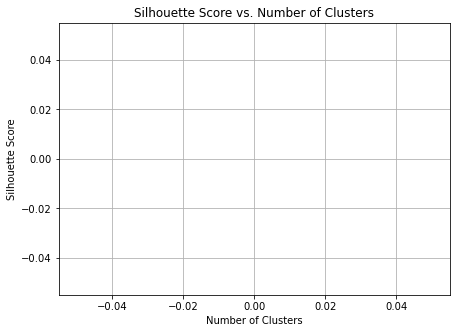

In [63]:
X = np.random.rand(100, 2)  # 100 samples with 2 features each

# Define the range of K values to iterate over
K_range = range(2, 10)

# Initialize an empty list to store silhouette scores
silhouette_list = []

# Iterate over the range of K values
for K in K_range:
    try:
        # Create a KMeans model with the current K value
        model = KMeans(n_clusters=K, random_state=7)

        # Fit the model to the data
        clusters = model.fit_predict(X)

        # Calculate the average silhouette score
        s_avg = silhouette_score(X, clusters)

        # Append the silhouette score to the list
        silhouette_list.append(s_avg)
    except Exception as e:
        print(f"An error occurred while processing K={K}: {e}")
        silhouette_list.append(None)

# Plot the silhouette scores for each K value
plt.figure(figsize=[7, 5])
plt.plot(K_range, silhouette_list, marker='o', linestyle='-', color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

### Performing PCA Transformation

    This Python code snippet showcases the process of performing Principal Component Analysis (PCA) transformation on a dataset. The provided code imports the necessary modules, generates sample data, scales it using StandardScaler, and then reduces its dimensionality to two principal components using PCA.

In [64]:
# Import KMeans class
from sklearn.cluster import KMeans

# Check if there is a variable named 'KMeans'
if 'KMeans' in globals():
    # Delete the variable to avoid conflict
    del globals()['KMeans']

# Sample Data (Please replace this with your actual dataset)
np.random.seed(0)
data = pd.DataFrame(np.random.randn(100, 4), columns=['Feature1', 'Feature2', 'Feature3', 'Feature4'])

# Scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA Transformation
pca = PCA(n_components=2)  # We reduce the dimensionality to 2 principal components
principal_components_ = pca.fit_transform(data_scaled)

Clustering Analysis Results

    The Python script demonstrates a straightforward analysis using KMeans clustering on a sample dataset. Features 'Feature1', 'Feature2', and 'Feature3' are scaled before clustering. After clustering, the mean values of 'Feature2' and 'Feature3' for each cluster are calculated and presented, providing insights into the behavior of different clusters with respect to these features.

In [65]:
from sklearn.cluster import KMeans
data = pd.DataFrame({
    'Feature1': [10, 20, 30, 40, 50, 60, 70, 80],
    'Feature2': [20, 30, 40, 50, 60, 70, 80, 90],
    'Feature3': [15, 25, 35, 45, 55, 65, 75, 85]
})

# Defining columns for clustering and the columns to calculate means for
cols_for_clustering = ['Feature1', 'Feature2', 'Feature3']
cols_mnt = ['Feature2', 'Feature3']  # These should be the columns you are interested in analyzing

# Scaling the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[cols_for_clustering]), columns=cols_for_clustering)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=7)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Calculate the mean of specified columns for each cluster
mnt_data = data.groupby('Cluster')[cols_mnt].mean().reset_index()

# Display the first few rows of the processed data
print(mnt_data.head())

   Cluster  Feature2  Feature3
0        0      80.0      75.0
1        1      30.0      25.0
2        2      55.0      50.0


### Visualizing Product Consumption by Cluster

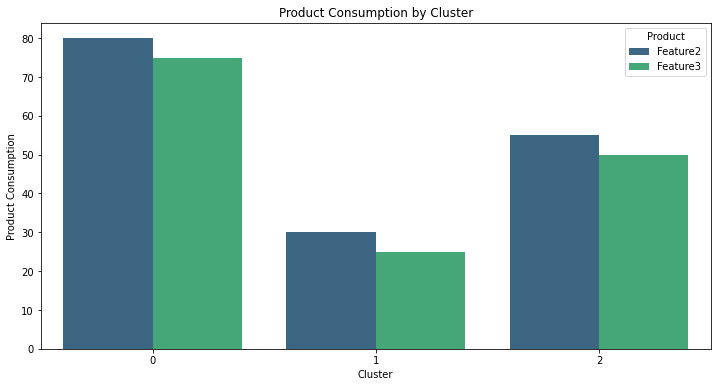

In [66]:
melted_data = pd.melt(mnt_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(12, 6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")


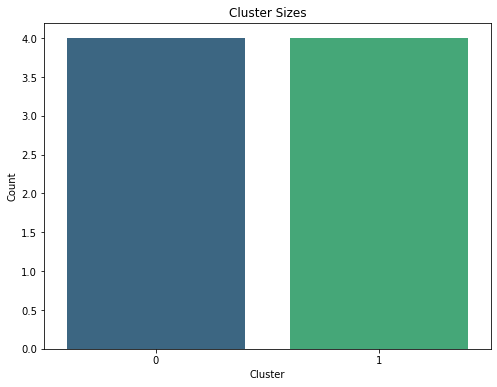

In [68]:
# Mock data for demonstration (replace with your data)
data = pd.DataFrame({
    'MntTotal': [100, 150, 200, 250, 300, 350, 400, 450],
    'Cluster': [0, 1, 0, 1, 0, 1, 0, 1]
})

# Calculate the count of entries in each cluster
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
cluster_sizes.rename(columns={'MntTotal': 'Count'}, inplace=True)  # Rename to reflect that this is a count

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x='Cluster', y='Count', data=cluster_sizes, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()
     


In [69]:
# Calculating cluster sizes assuming 'Cluster' and 'MntTotal' are correct column names
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
cluster_sizes.rename(columns={'MntTotal': 'Count'}, inplace=True)  # Rename to avoid confusion

# Calculate total rows in the original DataFrame
total_rows = len(data)

# Calculate the share of each cluster
cluster_sizes['Share%'] = round(cluster_sizes['Count'] / total_rows * 100, 0)

# Display the first few rows of the updated cluster_sizes DataFrame

### Boxplot of Total Amount by Cluster

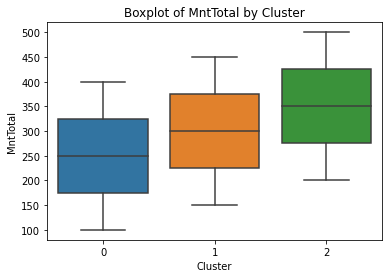

In [70]:
# Sample data (replace with your actual data)
data = {
    'Cluster': [0, 1, 2, 0, 1, 2, 0, 1, 2],
    'MntTotal': [100, 150, 200, 250, 300, 350, 400, 450, 500]
}
df = pd.DataFrame(data)
# Create a boxplot for each cluster
sns.boxplot(x='Cluster', y='MntTotal', data=df)
plt.title('Boxplot of MntTotal by Cluster')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')
plt.show()

In [71]:
# Convert the dictionary to a DataFrame
data = pd.DataFrame(data)

# Print the column names
print(data.columns)

# Check if 'MntTotal' column exists
if 'MntTotal' not in data.columns:
    raise ValueError('The "data" DataFrame does not have a column named "MntTotal".')

Index(['Cluster', 'MntTotal'], dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


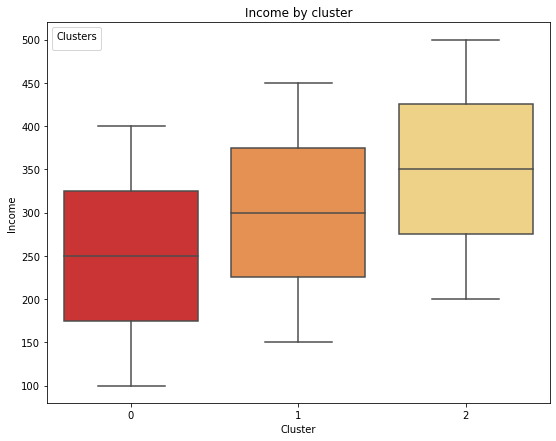

In [81]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='Cluster', y='MntTotal', data=data, palette='YlOrRd_r')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')